<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Session/Session221228_keras_fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

## **Keras를 이용한 기본 이미지 분류**

### | **패션 MNIST 데이터셋 임포트하기**
- **패션 MNIST 데이터셋** : 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 데이터셋
- 각 이미지는 28X28 픽셀로 되어 있다.
- 60,000개의 이미지는 훈련 데이터셋으로, 10,000개의 이미지는 평가 데이터셋으로 이용한다.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- `train_images`와 `train_labels` 배열 : 훈련셋
- `test_images`와 `test_labels` 배열 : 테스트셋
- 픽셀 값은 0과 255 사이의 값이다.
- 레이블(label)은 0에서 9가지의 정수 배열이다. 옷의 클래스를 의미한다.
  - 0 : T-shirt/top
  - 1 : Trouser
  - 2	: Pullover
  - 3	: Dress
  - 4	: Coat
  - 5	: Sandal
  - 6	: Shirt
  - 7	: Sneaker
  - 8	: Bag
  - 9	: Ankle boot
- 각 이미지는 하나의 레이블을 갖고 있다. 데이터셋에 클래스 이름이 포함되어 있지 않아, 뒤에서 이미지를 출력할 때 사용하기 위한 별도의 변수를 만들어 저장한다.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### | **데이터 탐색**
- 데이터셋 구조를 살펴보자.
- 아래는 이미지 데이터셋과 레이블 값의 크기를 확인해보는 코드이다.

In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- 각 레이블의 값은 0과 9 사이의 정수이다.
- 테스트셋의 크기도 살펴보자.

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

### | **데이터 전처리**
- 훈련 데이터셋에 있는 첫 번째 이미지를 살펴보자.
- 오른쪽 바를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있다.

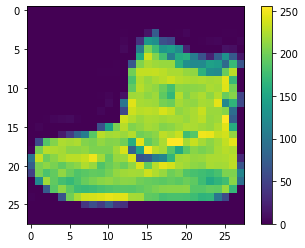

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- 신경망 모델을 훈련시키 전 스케일링을 통해 이 값의 범위를 0과 1 사이로 조정하자.
- 훈련 데이터셋과 테스트 데이터셋을 동일한 방식으로 전처리하는 것이 중요하다.

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

- 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해보자. 데이터 포맷이 올바른지 확인하고, 모델 구성과 훈련할 준비를 마친다.

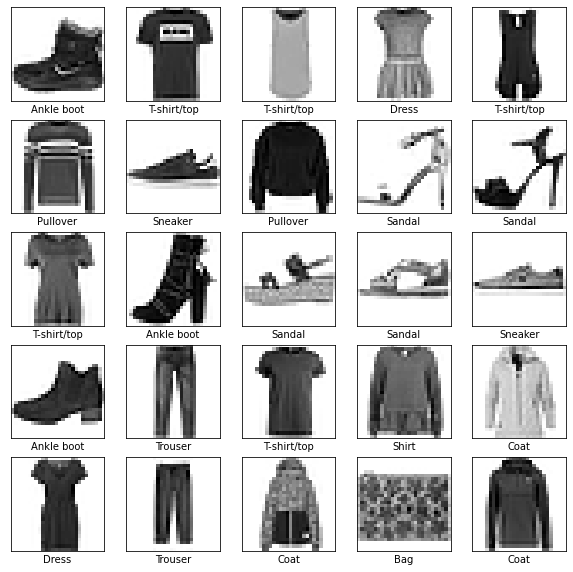

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### | **모델 구성**

#### **층 설정**
___
- 신경망은 기본적으로 레이어로 구성되어 있다.
- 대부분 딥러닝은 간단한 층을 연결하여 구성한다.
- `tf.keras.layers.Dense`와 같은 층들의 가중치는 훈련하는 동안 업데이트된다.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- 이 모델은 먼저 2차원 배열(28X28)인 이미지 데이터를 1차원 배열 형태로 변환한다.
- 그리고 `tf.keras.layers.Dense` 층이 연결되는데, 이 층을 fully-connected 층이라고 부른다.
- 첫 번째 `Dense` 레이어는 128개의 노드를 가지고 있으며 활성화 함수로 ReLU 함수를 적용한다.
- 마지막 레이어는 10개의 노드를 가지고 있으며 softmax를 활성화 함수로 사용한다.

#### **모델 컴파일**
___
- 이제 손실함수, 옵티마이져, 평가지표(metrics)을 설정해보자.
- 손실함수는 훈련 중 모델이 얼마나 정확한지 측정하며, 모델을 올바른 방향으로 학습시키는 것은 이 함수의 값이 최소화되는 것을 의미한다.
- 옵티마이저(optimizer)는 손실 함수를 최소화하는 방향으로 모델을 업데이트하는 방법이다.
- 평가지표(metrics)는 훈련 및 테스트 단계에서 모델을 예측 성능을 확인하기 위한 지표이다.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### | **모델 훈련**
1. 훈련 데이터셋을 모델에 입력한다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배운다.
3. 테스트셋에 대한 모델의 예측을 만들고 이 예측이 정확한지 확인해본다.

#### **모델 피드**
___
- 모델 훈련은 `fit()` 메서드를 이용해 진행할 수 있다.
- 모델이 훈련되면서 손실과 정확도 지표가 출력된다.

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4957 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3729 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3341 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3096 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2534 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2437 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

#### **정확도 평가**
___
- 테스트 데이터셋에서의 성능을 확인해본다.
- 해당 모델은 테스트셋의 정확도가 훈련 데이터셋의 정확도보다 조금 낮다. 이는 과대적합(overfitting) 때문이다.

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3341 - accuracy: 0.8854 - 431ms/epoch - 1ms/step
Test accuracy: 0.8853999972343445


#### **예측하기**
___
- 훈련된 모델을 사용하여 이미지에 대한 예측을 수행해보자.
- 모델의 선형 출력, 로짓, 소프트맥스 레이어를 연결하여, 로짓값을 확률 형식으로 변환한다.

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [19]:
predictions[0]

array([1.04783517e-07, 7.13238288e-11, 4.95405006e-09, 9.66292259e-13,
       1.14565255e-08, 1.19570559e-02, 1.37572478e-08, 7.02754175e-03,
       3.15757442e-09, 9.81015384e-01], dtype=float32)

- 각 값은 10개의 옷 품목에 상응하는 모델의 신뢰도를 나타낸다.
- 가장 높은 신뢰도를 가진 레이블을 찾아보자.

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0] # 테스트 레이블 확인

9

#### **예측 확인**
___

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

- 위에서 만든 함수들을 이용하여 일부 이미지에 대한 예측을 수행하고, 0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해보자.

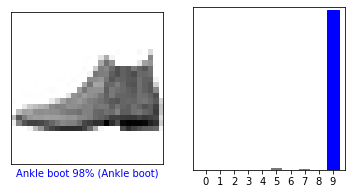

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels) # 신뢰도 점수
plt.show()

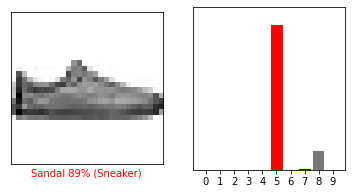

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

- 올바르게 예측된 레이블은 파란색이고, 잘못 예측된 레이블은 빨강색이다.
- 오른쪽 그래프의 y축 값은 예측 레이블의 신뢰도 퍼센트이다.
- 신뢰도 점수가 높아도 잘못 예측할 수 있다.

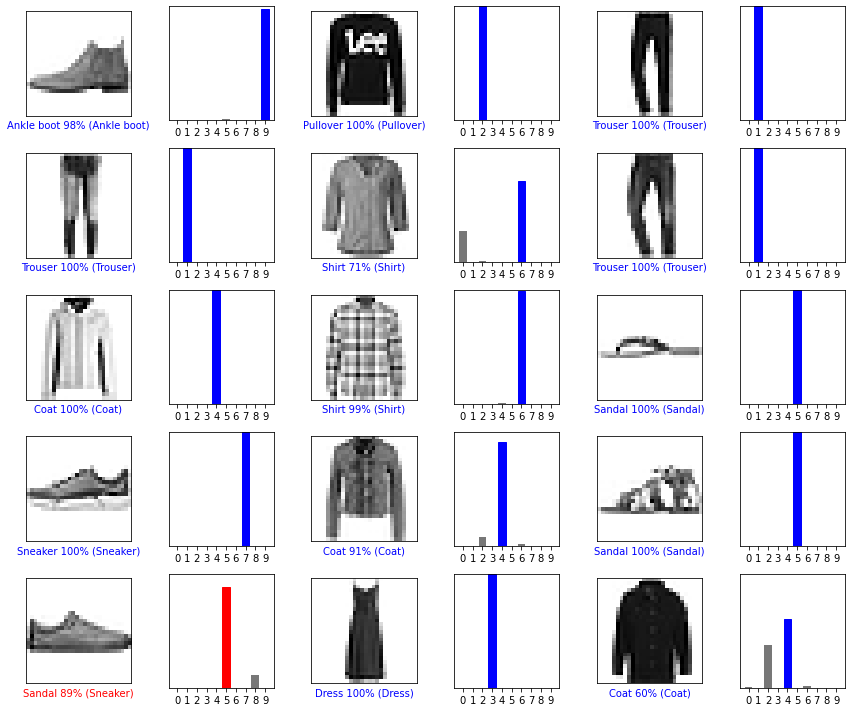

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### | **훈련된 모델 사용하기**
- 마지막으로 훈련된 모델을 이용하여, 이미지 한 개에 대한 예측을 만들어보자.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 31ms/step
[[1.0888293e-04 5.0567780e-13 9.9926132e-01 2.0638586e-09 3.7678599e-04
  4.8976964e-12 2.5304791e-04 1.0340598e-18 5.4584965e-11 3.2286760e-12]]


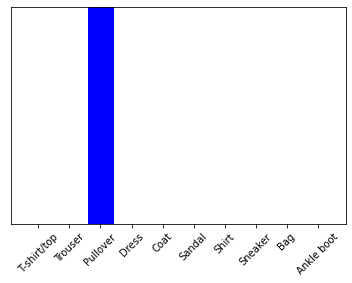

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

- `tf.keras.Model.predict`은 배치의 각 이미지에 대해 하나의 이중 리스트를 반환한다.


In [31]:
np.argmax(predictions_single[0])

2